## Scaling data

### Dataset target modelign

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 
%matplotlib inline

#### Load the 'Boston' dataset from Scikit-Learn and convert it into a DataFrame:

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
filas_pares = raw_df.values[::2, :]
filas_impares = raw_df.values[1::2, :2] #filas impares Hasta la columna 2 (0 y 1)
data = np.hstack([filas_pares,filas_impares])
target = raw_df.values[1::2, 2] # El precio que es la y, esta en las filas impares  en la columna 2

In [3]:
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [4]:
# The variables.
X = data
Y = target
Y_reg = Y.reshape(-1, 1)

In [5]:
# Transform into a DataFrame for regression target dataset.
df_reg = pd.DataFrame(np.append(X,Y_reg,axis = 1))
df_reg.columns = list(header) + ['PRICE']

In [6]:
df_reg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Discretización de variable objetivo

In [7]:
max_value = Y.max()
bins = [0, max_value / 4, max_value / 2, (3 * max_value) / 4, max_value]  # Dividimos en 4 intervalos
# Create groups "accessible", "medium", "expensive" and "luxury"
df_diag = pd.Series(Y)
df_diag = pd.cut(df_diag, bins=bins, labels=["accessible", "medium", "expensive", "luxury"], include_lowest=True)
df_diag.value_counts()

medium        335
expensive      89
accessible     47
luxury         35
Name: count, dtype: int64

In [8]:
df_diag

0          medium
1          medium
2       expensive
3       expensive
4       expensive
          ...    
501        medium
502        medium
503        medium
504        medium
505    accessible
Length: 506, dtype: category
Categories (4, object): ['accessible' < 'medium' < 'expensive' < 'luxury']

In [9]:
# Transform into a DataFrame.
df_class = pd.DataFrame(np.append(X,df_diag.values.reshape(-1, 1),axis = 1))
df_class.columns = list(header) + ['PRICE']

In [10]:
df_class

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,expensive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,expensive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,medium
502,0.04527,0.0,11.93,0.0,0.573,6.12,76.7,2.2875,1.0,273.0,21.0,396.9,9.08,medium
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.9,5.64,medium
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,medium


In [11]:
#Get X and Y
X = df_class.drop(columns=['PRICE']).values
y = df_class['PRICE'].values

#### MaxMinScaler, StandardScaler, RobustScaler, MaxAbsScaler.


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_MMS = scaler.fit_transform(X)

df_MMS = pd.DataFrame(X_MMS, columns=header)
df_MMS.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_SS = scaler.fit_transform(X)

df_SS = pd.DataFrame(X_SS, columns=header)
df_SS.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_RS = scaler.fit_transform(X)

df_RS = pd.DataFrame(X_RS, columns=header)
df_RS.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699


In [15]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_MAS = scaler.fit_transform(X)

df_MAS = pd.DataFrame(X_MAS, columns=header)
df_MAS.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000071,0.18,0.083273,0.0,0.617681,0.748861,0.652,0.337278,0.041667,0.416315,0.695455,1.000000,0.131156
1,0.000307,0.00,0.254867,0.0,0.538462,0.731321,0.789,0.409607,0.083333,0.340366,0.809091,1.000000,0.240716
2,0.000307,0.00,0.254867,0.0,0.538462,0.818337,0.611,0.409607,0.083333,0.340366,0.809091,0.989746,0.106136
3,0.000364,0.00,0.078587,0.0,0.525832,0.797039,0.458,0.499913,0.125000,0.312236,0.850000,0.994281,0.077430
4,0.000776,0.00,0.078587,0.0,0.525832,0.814009,0.542,0.499913,0.125000,0.312236,0.850000,1.000000,0.140374


### Classification

In [16]:
#División del dataset en entreno y test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def random_forest_classificator(X,y):
    random_state=42
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=random_state, stratify=y)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8, 10],
    }

    rf = RandomForestClassifier(random_state=random_state)

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_rf = grid_search.best_estimator_

    y_pred = best_rf.predict(X_test)    
    print("Best parameters found: ", best_params)
    print("Confussion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    print("Report:\n")
    print (classification_report(y_pred,y_test))

#### Max min scaler

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 8, 'n_estimators': 300}
Confussion Matrix:



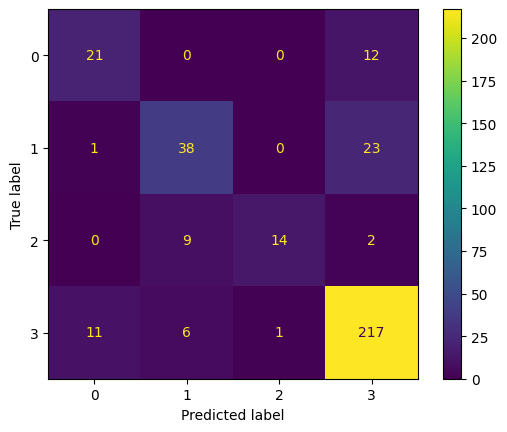

Report:

              precision    recall  f1-score   support

  accessible       0.64      0.64      0.64        33
   expensive       0.61      0.72      0.66        53
      luxury       0.56      0.93      0.70        15
      medium       0.92      0.85      0.89       254

    accuracy                           0.82       355
   macro avg       0.68      0.79      0.72       355
weighted avg       0.84      0.82      0.82       355



In [17]:
#MaxMin scaler
random_forest_classificator(X_MMS,y)

#### Standard scaler

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 8, 'n_estimators': 300}
Confussion Matrix:



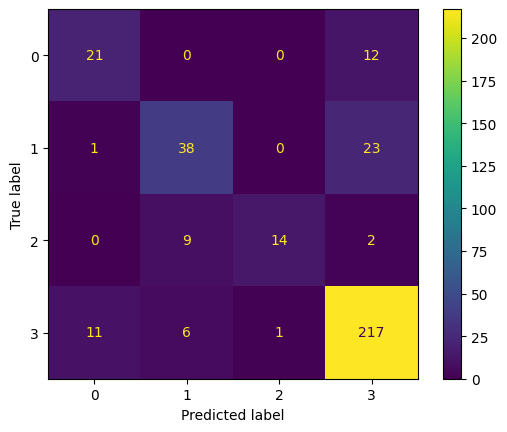

Report:

              precision    recall  f1-score   support

  accessible       0.64      0.64      0.64        33
   expensive       0.61      0.72      0.66        53
      luxury       0.56      0.93      0.70        15
      medium       0.92      0.85      0.89       254

    accuracy                           0.82       355
   macro avg       0.68      0.79      0.72       355
weighted avg       0.84      0.82      0.82       355



In [ ]:
#Standart scale
random_forest_classificator(X_SS,y)

#### Robust scaler

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 8, 'n_estimators': 300}
Confussion Matrix:



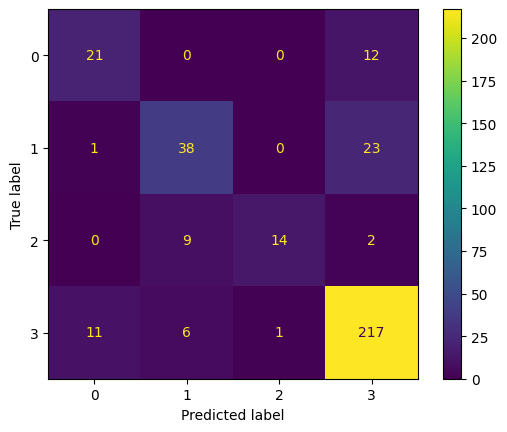

Report:

              precision    recall  f1-score   support

  accessible       0.64      0.64      0.64        33
   expensive       0.61      0.72      0.66        53
      luxury       0.56      0.93      0.70        15
      medium       0.92      0.85      0.89       254

    accuracy                           0.82       355
   macro avg       0.68      0.79      0.72       355
weighted avg       0.84      0.82      0.82       355



In [19]:
#Robust scaler
random_forest_classificator(X_RS,y)

#### Max abs scaler

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best parameters found:  {'max_depth': 8, 'n_estimators': 300}
Confussion Matrix:



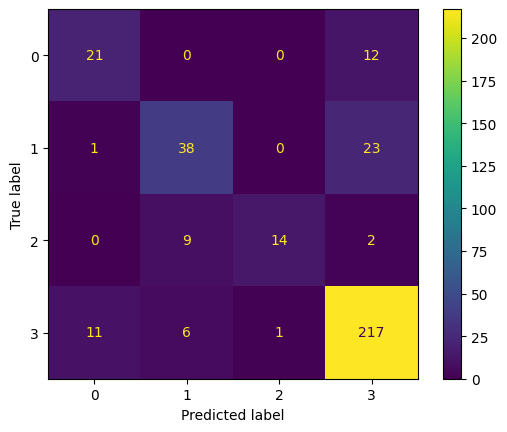

Report:

              precision    recall  f1-score   support

  accessible       0.64      0.64      0.64        33
   expensive       0.61      0.72      0.66        53
      luxury       0.56      0.93      0.70        15
      medium       0.92      0.85      0.89       254

    accuracy                           0.82       355
   macro avg       0.68      0.79      0.72       355
weighted avg       0.84      0.82      0.82       355



In [20]:
#MaxAbs Scaler
random_forest_classificator(X_MAS,y)

### Conclusion

En este caso, no se observa mucha diferencia con las distintas formas de escalado, esto se puede deber a que la sencillez de los datos o la naturaleza de los mismos.